# Exercise - Black's Formula for Options on Futures

#### Notation Commands

$$\newcommand{\Black}{\mathcal{B}}
\newcommand{\Blackcall}{\Black_{\mathrm{call}}}
\newcommand{\Blackput}{\Black_{\mathrm{put}}}
\newcommand{\EcondS}{\hat{S}_{\mathrm{conditional}}}
\newcommand{\Efwd}{\mathbb{E}^{T}}
\newcommand{\Ern}{\mathbb{E}^{\mathbb{Q}}}
\newcommand{\Tfwd}{T_{\mathrm{fwd}}}
\newcommand{\Tunder}{T_{\mathrm{bond}}}
\newcommand{\accint}{A}
\newcommand{\carry}{\widetilde{\cpn}}
\newcommand{\cashflow}{C}
\newcommand{\convert}{\phi}
\newcommand{\cpn}{c}
\newcommand{\ctd}{\mathrm{CTD}}
\newcommand{\disc}{Z}
\newcommand{\done}{d_{1}}
\newcommand{\dt}{\Delta t}
\newcommand{\dtwo}{d_{2}}
\newcommand{\flatvol}{\sigma_{\mathrm{flat}}}
\newcommand{\flatvolT}{\sigma_{\mathrm{flat},T}}
\newcommand{\float}{\mathrm{flt}}
\newcommand{\freq}{m}
\newcommand{\futprice}{\mathcal{F}(t,T)}
\newcommand{\futpriceDT}{\mathcal{F}(t+h,T)}
\newcommand{\futpriceT}{\mathcal{F}(T,T)}
\newcommand{\futrate}{\mathscr{f}}
\newcommand{\fwdprice}{F(t,T)}
\newcommand{\fwdpriceDT}{F(t+h,T)}
\newcommand{\fwdpriceT}{F(T,T)}
\newcommand{\fwdrate}{f}
\newcommand{\fwdvol}{\sigma_{\mathrm{fwd}}}
\newcommand{\fwdvolTi}{\sigma_{\mathrm{fwd},T_i}}
\newcommand{\grossbasis}{B}
\newcommand{\hedge}{\Delta}
\newcommand{\ivol}{\sigma_{\mathrm{imp}}}
\newcommand{\logprice}{p}
\newcommand{\logyield}{y}
\newcommand{\mat}{(n)}
\newcommand{\nargcond}{d_{1}}
\newcommand{\nargexer}{d_{2}}
\newcommand{\netbasis}{\tilde{\grossbasis}}
\newcommand{\normcdf}{\mathcal{N}}
\newcommand{\notional}{K}
\newcommand{\pfwd}{P_{\mathrm{fwd}}}
\newcommand{\pnl}{\Pi}
\newcommand{\price}{P}
\newcommand{\probexer}{\hat{\mathcal{P}}_{\mathrm{exercise}}}
\newcommand{\pvstrike}{K^*}
\newcommand{\refrate}{r^{\mathrm{ref}}}
\newcommand{\rrepo}{r^{\mathrm{repo}}}
\newcommand{\spotrate}{r}
\newcommand{\spread}{s}
\newcommand{\strike}{K}
\newcommand{\swap}{\mathrm{sw}}
\newcommand{\swaprate}{\cpn_{\swap}}
\newcommand{\tbond}{\mathrm{fix}}
\newcommand{\ttm}{\tau}
\newcommand{\value}{V}
\newcommand{\vega}{\nu}
\newcommand{\years}{\tau}
\newcommand{\yearsACT}{\tau_{\mathrm{act/360}}}
\newcommand{\yield}{Y}$$

### Data

In this exercise, we use Black's formula to price options on futures contracts.
* `option_data_bb_SFRZ5.xlsx` - market data on SOFR 3-month futures, and its option chain.

# 1. SOFR Futures Options

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

ss = 1.25
fs = 14

In [2]:
FILEDATA = "option_data_bb_SFRZ5.xlsx"
SHEETNAME = 'spot'
spot = pd.read_excel(FILEDATA, sheet_name=SHEETNAME).rename(columns={'Unnamed: 0': 'field'}).set_index('field')
display(spot)

,SFRZ5 Comdty
field,
name,3 MONTH SOFR FUT Dec25
last update date,2025-07-29 00:00:00
last update time,10:03:48
price,96.085
hist vol 30d,0.006851
hist vol 60d,0.007595
volume,150071


In [3]:
EXPRY_CHAIN_LOC = 1
SHEETNAME = pd.ExcelFile(FILEDATA).sheet_names[EXPRY_CHAIN_LOC]
options = pd.read_excel(FILEDATA, sheet_name=SHEETNAME).set_index('ticker')
display(options.loc[options['option type'].str.contains('C')])
display(options.loc[options['option type'].str.contains('P')])

,last update date,last update time,days to expiration,option type,exercise style,option contract size,strike price,price,finance rate,time value,...,delta,gamma,vega,theta,bid,ask,bid size,ask size,open int,volume
ticker,,,,,,,,,,,,,,,,,,,,,
SFRV5C 95.75 Comdty,2025-07-28,2025-07-28 00:00:00,73,C,AMER,2500,95.7500,0.3300,0.04396,-0.0050,...,0.899011,0.028984,0.002962,-0.000265,0.3350,0.350,51,51,10703,NaN
SFRV5C 95.8125 Comdty,2025-07-28,2025-07-28 00:00:00,73,C,AMER,2500,95.8125,0.2775,0.04396,0.0050,...,0.847946,0.037543,0.003990,-0.000369,0.2850,0.295,120,333,0,NaN
SFRV5C 95.875 Comdty,2025-07-28,2025-07-28 00:00:00,73,C,AMER,2500,95.8750,0.2325,0.04396,0.0225,...,0.768768,0.045176,0.005212,-0.000524,0.2350,0.245,14976,119,20020,NaN
SFRV5C 95.9375 Comdty,2025-07-28,2025-07-28 00:00:00,73,C,AMER,2500,95.9375,0.1950,0.04396,0.0475,...,0.679044,0.049114,0.006161,-0.000676,0.1950,0.205,15838,248,7013,NaN
SFRV5C 96 Comdty,2025-07-28,2025-07-28 00:00:00,73,C,AMER,2500,96.0000,0.1600,0.04396,0.0750,...,0.589523,0.049138,0.006712,-0.000805,0.1600,0.175,7500,19302,15635,NaN
SFRV5C 96.0625 Comdty,2025-07-28,2025-07-28 00:00:00,73,C,AMER,2500,96.0625,0.1300,0.04396,0.1075,...,0.506743,0.047811,0.006902,-0.000892,0.1350,0.145,100,36274,31106,3882.0
SFRV5C 96.125 Comdty,2025-07-28,2025-07-28 00:00:00,73,C,AMER,2500,96.1250,0.1050,0.04396,0.1050,...,0.430860,0.046676,0.006811,-0.000887,0.1050,0.115,37066,8327,43461,2500.0
SFRV5C 96.1875 Comdty,2025-07-29,08:33:45,73,C,AMER,2500,96.1875,0.0850,0.04396,0.0850,...,0.360056,0.043005,0.006494,-0.000875,0.0800,0.095,56885,48479,76938,2698.0
SFRV5C 96.25 Comdty,2025-07-28,2025-07-28 00:00:00,73,C,AMER,2500,96.2500,0.0675,0.04396,0.0675,...,0.297882,0.038291,0.006022,-0.000844,0.0650,0.075,46199,27485,72563,9950.0


,last update date,last update time,days to expiration,option type,exercise style,option contract size,strike price,price,finance rate,time value,...,delta,gamma,vega,theta,bid,ask,bid size,ask size,open int,volume
ticker,,,,,,,,,,,,,,,,,,,,,
SFRV5P 95.75 Comdty,2025-07-28,2025-07-28 00:00:00,73,P,AMER,2500,95.7500,0.0075,0.04396,0.0075,...,-0.076812,0.025414,0.002511,-0.000220,0.0050,0.010,25297,11208,57342,2550.0
SFRV5P 95.8125 Comdty,2025-07-28,2025-07-28 00:00:00,73,P,AMER,2500,95.8125,0.0175,0.04396,0.0175,...,-0.138375,0.036404,0.003844,-0.000361,0.0125,0.020,50328,39390,18597,NaN
SFRV5P 95.875 Comdty,2025-07-28,2025-07-28 00:00:00,73,P,AMER,2500,95.8750,0.0350,0.04396,0.0350,...,-0.219462,0.045113,0.005143,-0.000522,0.0275,0.035,40887,8311,50736,5225.0
SFRV5P 95.9375 Comdty,2025-07-28,2025-07-28 00:00:00,73,P,AMER,2500,95.9375,0.0575,0.04396,0.0575,...,-0.313520,0.049041,0.006158,-0.000689,0.0500,0.060,33397,49762,18828,NaN
SFRV5P 96 Comdty,2025-07-28,2025-07-28 00:00:00,73,P,AMER,2500,96.0000,0.0850,0.04396,0.0850,...,-0.398240,0.051125,0.006694,-0.000782,0.0750,0.085,53974,758,62162,1000.0
SFRV5P 96.0625 Comdty,2025-07-28,2025-07-28 00:00:00,73,P,AMER,2500,96.0625,0.1175,0.04396,0.1175,...,-0.483743,0.048766,0.006901,-0.000871,0.1100,0.120,1197,40350,11505,3286.0
SFRV5P 96.125 Comdty,2025-07-28,2025-07-28 00:00:00,73,P,AMER,2500,96.1250,0.1550,0.04396,0.1150,...,-0.560378,0.046505,0.006812,-0.000895,0.1450,0.155,867,34387,63551,NaN
SFRV5P 96.1875 Comdty,2025-07-28,2025-07-28 00:00:00,73,P,AMER,2500,96.1875,0.1950,0.04396,0.0925,...,-0.634074,0.043781,0.006484,-0.000842,0.1850,0.195,353,22485,14955,NaN
SFRV5P 96.25 Comdty,2025-07-28,2025-07-28 00:00:00,73,P,AMER,2500,96.2500,0.2425,0.04396,0.0775,...,-0.698355,0.038957,0.005992,-0.000807,0.2300,0.240,238,17500,13145,NaN


### 1.1.

Use Black's Formula to price the **call option**
* at the nearest expiration
* using the ATM strike (strike nearest the spot)
* using the implied vol provided in the data
* using the finance rate as the discount rate

How close is your estimate to the market quote?

In [4]:
FILEDATA = "option_data_bb_SFRZ5.xlsx"
SHEETNAME = 'spot'
spot = pd.read_excel(FILEDATA, sheet_name=SHEETNAME).rename(columns={'Unnamed: 0': 'field'}).set_index('field')
options = pd.read_excel(FILEDATA, sheet_name = '2025-10-10')
options_row = options.iloc[5] # Index of closest call strike price

In [5]:
def black_call(F, K, sigma, r, tau):    
    d1 = (np.log(F / K) + 0.5 * sigma**2 * tau) / (sigma * np.sqrt(tau))
    d2 = d1 - sigma * np.sqrt(tau)
    discount = np.exp(-r * tau)
    return discount * (F * norm.cdf(d1) - K * norm.cdf(d2))

F = spot.loc['price', spot.columns[0]]
K = options_row.loc['strike price']
sigma = options_row.loc['implied vol']*(100-F)/100
r = options_row.loc['finance rate']
tau = options_row.loc['days to expiration']/365

print("F:", F)
print("K:", K)
print("sigma:", sigma)
print("r:", r)
print("tau:", tau)

model_price = black_call(F, K, sigma, r, tau)
print("\nBlacks model price:", model_price)
print("Market quote:", options_row.loc['price'])

F: 96.085
K: 96.0625
sigma: 0.007259889478500012
r: 0.04396000003814697
tau: 0.2

Blacks model price: 0.1348229012049109
Market quote: 0.13


### 1.2.

Value the entire strike chain for the nearest expiration.
* Use the provided implied vol for each strike.

Plot the Black values against the market values.

,option type,Strike,Implied Vol,Black Price,Market Price,Implied Vol,Implied Vol Price,Open Interest
0,C,95.7500,0.140374,0.340246,0.3300,0.140374,0.005496,10703
1,C,95.8125,0.141465,0.284843,0.2775,0.141465,0.005538,0
2,C,95.8750,0.150695,0.236811,0.2325,0.150695,0.005900,20020
3,C,95.9375,0.162524,0.196517,0.1950,0.162524,0.006363,7013
4,C,96.0000,0.176306,0.164152,0.1600,0.176306,0.006902,15635
5,C,96.0625,0.185438,0.134823,0.1300,0.185438,0.007260,31106
6,C,96.1250,0.187461,0.105914,0.1050,0.187461,0.007339,43461
7,C,96.1875,0.193992,0.084633,0.0850,0.193992,0.007595,76938
8,C,96.2500,0.202020,0.068257,0.0675,0.202020,0.007909,72563
9,C,96.3125,0.213201,0.056831,0.0550,0.213201,0.008347,53442


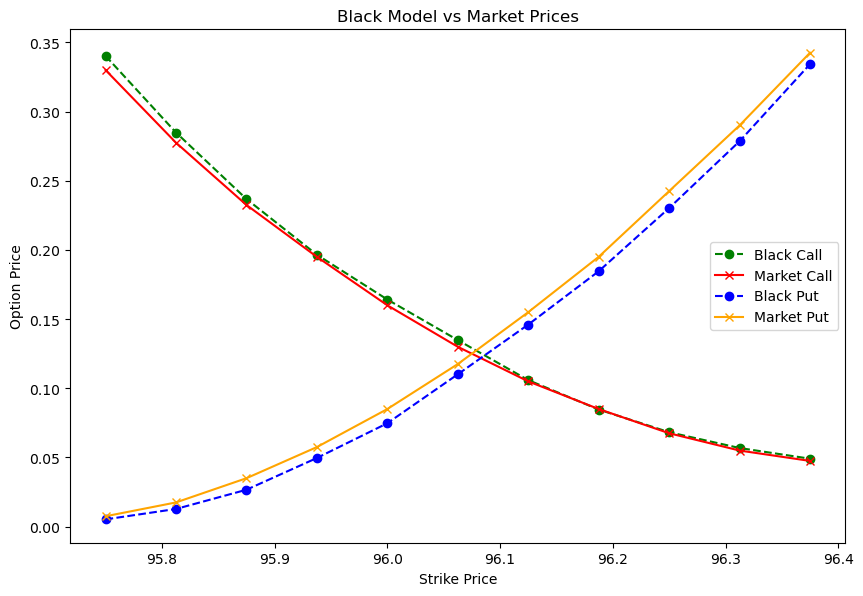

In [22]:
def black_put(F, K, sigma, r, tau):
    d1 = (np.log(F / K) + 0.5 * sigma**2 * tau) / (sigma * np.sqrt(tau))
    d2 = d1 - sigma * np.sqrt(tau)
    discount = np.exp(-r * tau)
    return discount * (K * norm.cdf(-d2) - F * norm.cdf(-d1))

F = spot.loc['price', spot.columns[0]]

tau = options['days to expiration'].iloc[0] / 365
r = options['finance rate'].iloc[0]

options['adj_sigma'] = options['implied vol'] * (100 - F) / 100

options['black_price'] = np.where(
    options['option type'] == 'C',
    black_call(F,
               options['strike price'],
               options['adj_sigma'],
               r,
               tau),
    black_put(F,
              options['strike price'],
              options['adj_sigma'],
              r,
              tau)
)

comparison_table = options[['option type',
                            'strike price',
                            'implied vol',
                            'black_price',
                            'price',
                            'implied vol',
                            'adj_sigma',
                            'open int']].copy()

comparison_table = comparison_table.rename(columns={
    'strike price': 'Strike',
    'implied vol': 'Implied Vol',
    'black_price': 'Black Price',
    'price': 'Market Price',
    'implied vol': 'Implied Vol',
    'adj_sigma': 'Implied Vol Price',
    'open int': 'Open Interest'
})

display(comparison_table)


calls = comparison_table[comparison_table['option type'] == 'C']
puts  = comparison_table[comparison_table['option type'] == 'P']

plt.figure(figsize=(ss*8, ss*16/3))
plt.plot(calls['Strike'], calls['Black Price'], marker='o', label='Black Call', linestyle = 'dashed', color = 'green')
plt.plot(calls['Strike'], calls['Market Price'], marker='x', label='Market Call', color = 'red')
plt.plot(puts['Strike'], puts['Black Price'], marker='o', label='Black Put', linestyle = 'dashed', color = 'blue')
plt.plot(puts['Strike'], puts['Market Price'], marker='x', label='Market Put', color = 'orange')
plt.title('Black Model vs Market Prices')
plt.xlabel('Strike Price')
plt.ylabel('Option Price')
plt.legend()
plt.show()

### 1.3. 

What are a few reasons that Black's value doesn't match the market value?

How significant is the American nature of the exercise?

**Even using the market implied vol, Black's will not be a perfect estimate for the actual market prices. For one, Black's treats futures prices as lognormal, but interest rates don't follow that structure exactly so there is a slight mismatch in the model. We are also comparing to the price column for our sheet, but we could be comparing to toher prices such as last trade, bid, and ask price. These are all slightly different, which would shift our curves. Each different price could be used and shift the curve slightly, so there is some variance with our model based on which price we choose. There could also be some slight variation in our implied vol depending on factors like rounding and day count conventions.**

**Comparing the America vs European nature of the exercise, there should be minimal differences. Broadly speaking for futures options, American and European calls are the same and puts are approximately the same, so the benefit of using American is minimal. The value of American vs European for short SOFR options is also usually very small, so the difference is negligible.**

### 1.4.

How is implied vol being quoted? As in, does it reflect units of vol of percent changes in the SOFR rate? Or day-over-day differences? Or something else?

Use the data in `ref_rates.xlsx` to calculate the historic 60-day rolling volatility of the SOFR rate.

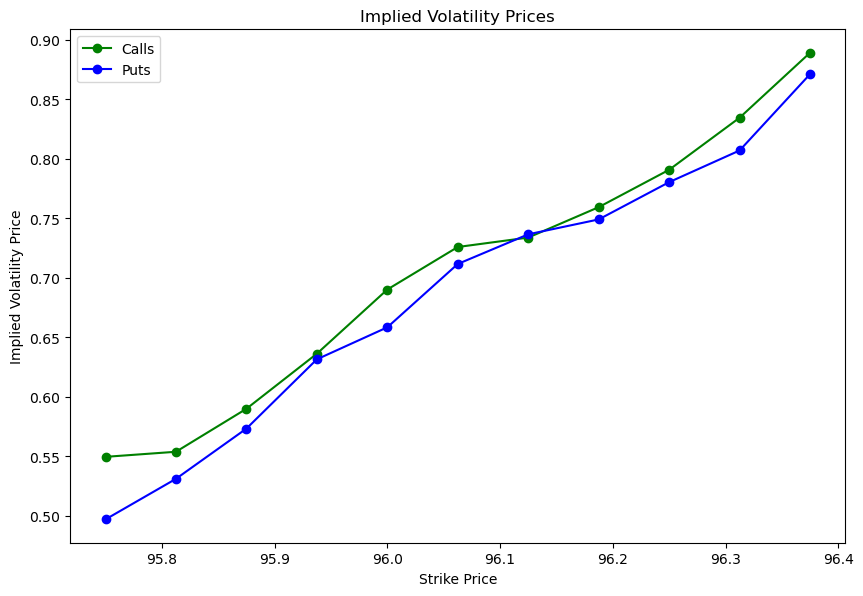

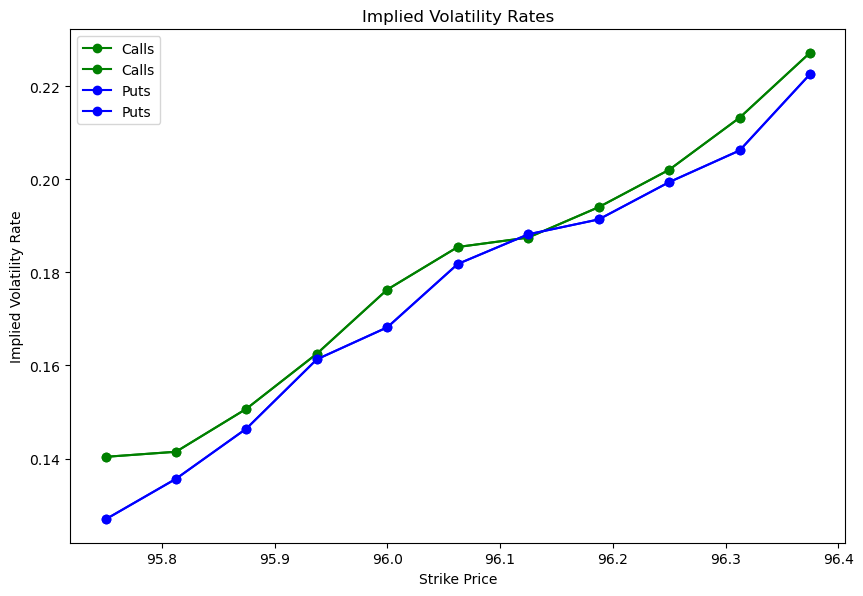

In [14]:
plt.figure(figsize=(ss*8, ss*16/3))
plt.plot(calls['Strike'], 100*calls['Implied Vol Price'], label='Calls', marker= 'o', color = 'green')
plt.plot(puts['Strike'], 100*puts['Implied Vol Price'], label='Puts', marker='o', color = 'blue')
plt.title('Implied Volatility Prices')
plt.xlabel('Strike Price')
plt.ylabel('Implied Volatility Price')
plt.legend()
plt.show()

plt.figure(figsize=(ss*8, ss*16/3))
plt.plot(calls['Strike'], calls['Implied Vol'], label='Calls', marker='o', color = 'green')
plt.plot(puts['Strike'], puts['Implied Vol'], label='Puts', marker='o', color = 'blue')
plt.title('Implied Volatility Rates')
plt.xlabel('Strike Price')
plt.ylabel('Implied Volatility Rate')
plt.legend()
plt.show()

,SOFR,Rolling Volatility
date,,
2018-04-03,1.83,NaN
2018-04-04,1.74,NaN
2018-04-05,1.75,NaN
2018-04-06,1.75,NaN
2018-04-07,1.75,NaN
...,...,...
2025-12-27,3.76,0.167736
2025-12-28,3.76,0.162026
2025-12-29,3.77,0.161873


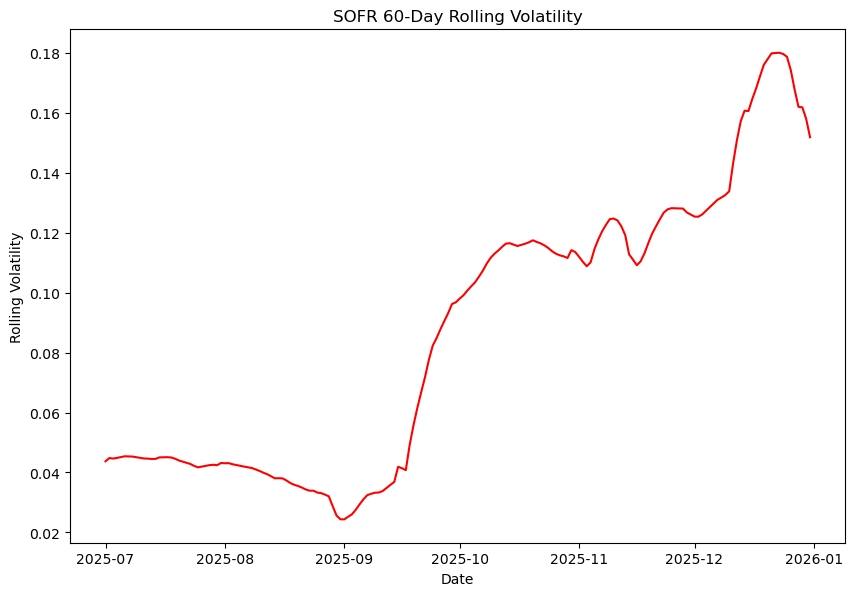

In [21]:
ref_rates = pd.read_excel('ref_rates.xlsx', sheet_name='data')
sofr = ref_rates[['date','SOFR']].ffill()
sofr.dropna(inplace=True)
sofr.set_index('date', inplace=True)
sofr['Rolling Volatility'] = sofr['SOFR'].rolling(window=60).std()
display(sofr)

plt.figure(figsize=(ss*8, ss*16/3))
plt.plot(sofr['2025-07-01':].index, sofr['2025-07-01':]['Rolling Volatility'], color = 'red')
plt.title('SOFR 60-Day Rolling Volatility')
plt.xlabel('Date')
plt.ylabel('Rolling Volatility')
plt.show()

**Implied Vol is being quoted in terms rates as the units of the SOFR rolling vol match that of the implied vol rates.**

### 1.5.

Plot the open interest across strikes. 

Report the total notional open interest across the chain for this expiration.

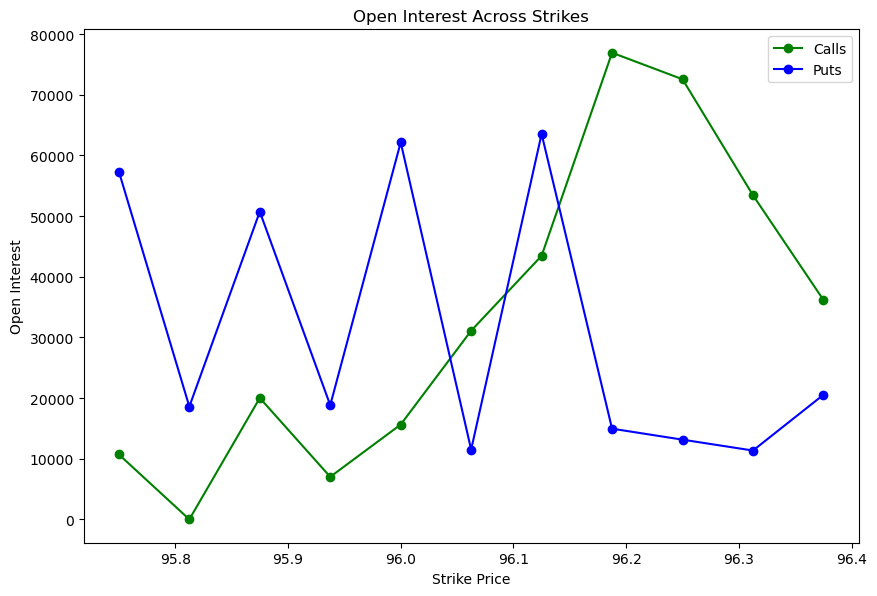

Total notional value (open interest calls): 3530235456.25
Total notional value (open interest puts): 3290130293.75


In [25]:
plt.figure(figsize=(ss*8, ss*16/3))
plt.plot(calls['Strike'], calls['Open Interest'], label='Calls', color = 'green', marker = 'o')
plt.plot(puts['Strike'], puts['Open Interest'], label='Puts', color = 'blue', marker = 'o')
plt.title('Open Interest Across Strikes')
plt.xlabel('Strike Price')
plt.ylabel('Open Interest')
plt.legend()
plt.show()
print("Total notional value (open interest calls):", round((calls['Open Interest'] * 100 * calls['Strike']).sum(), 2))
print("Total notional value (open interest puts):", round((puts['Open Interest'] * 100 * puts['Strike']).sum(), 2))

# Exercises - Pricing a Callable Bond


#### Notation Commands

$$\newcommand{\Black}{\mathcal{B}}
\newcommand{\Blackcall}{\Black_{\mathrm{call}}}
\newcommand{\Blackput}{\Black_{\mathrm{put}}}
\newcommand{\EcondS}{\hat{S}_{\mathrm{conditional}}}
\newcommand{\Efwd}{\mathbb{E}^{T}}
\newcommand{\Ern}{\mathbb{E}^{\mathbb{Q}}}
\newcommand{\Tfwd}{T_{\mathrm{fwd}}}
\newcommand{\Tunder}{T_{\mathrm{bond}}}
\newcommand{\accint}{A}
\newcommand{\carry}{\widetilde{\cpn}}
\newcommand{\cashflow}{C}
\newcommand{\convert}{\phi}
\newcommand{\cpn}{c}
\newcommand{\ctd}{\mathrm{CTD}}
\newcommand{\disc}{Z}
\newcommand{\done}{d_{1}}
\newcommand{\dt}{\Delta t}
\newcommand{\dtwo}{d_{2}}
\newcommand{\flatvol}{\sigma_{\mathrm{flat}}}
\newcommand{\flatvolT}{\sigma_{\mathrm{flat},T}}
\newcommand{\float}{\mathrm{flt}}
\newcommand{\freq}{m}
\newcommand{\futprice}{\mathcal{F}(t,T)}
\newcommand{\futpriceDT}{\mathcal{F}(t+h,T)}
\newcommand{\futpriceT}{\mathcal{F}(T,T)}
\newcommand{\futrate}{\mathscr{f}}
\newcommand{\fwdprice}{F(t,T)}
\newcommand{\fwdpriceDT}{F(t+h,T)}
\newcommand{\fwdpriceT}{F(T,T)}
\newcommand{\fwdrate}{f}
\newcommand{\fwdvol}{\sigma_{\mathrm{fwd}}}
\newcommand{\fwdvolTi}{\sigma_{\mathrm{fwd},T_i}}
\newcommand{\grossbasis}{B}
\newcommand{\hedge}{\Delta}
\newcommand{\ivol}{\sigma_{\mathrm{imp}}}
\newcommand{\logprice}{p}
\newcommand{\logyield}{y}
\newcommand{\mat}{(n)}
\newcommand{\nargcond}{d_{1}}
\newcommand{\nargexer}{d_{2}}
\newcommand{\netbasis}{\tilde{\grossbasis}}
\newcommand{\normcdf}{\mathcal{N}}
\newcommand{\notional}{K}
\newcommand{\pfwd}{P_{\mathrm{fwd}}}
\newcommand{\pnl}{\Pi}
\newcommand{\price}{P}
\newcommand{\probexer}{\hat{\mathcal{P}}_{\mathrm{exercise}}}
\newcommand{\pvstrike}{K^*}
\newcommand{\refrate}{r^{\mathrm{ref}}}
\newcommand{\rrepo}{r^{\mathrm{repo}}}
\newcommand{\spotrate}{r}
\newcommand{\spread}{s}
\newcommand{\strike}{K}
\newcommand{\swap}{\mathrm{sw}}
\newcommand{\swaprate}{\cpn_{\swap}}
\newcommand{\tbond}{\mathrm{fix}}
\newcommand{\ttm}{\tau}
\newcommand{\value}{V}
\newcommand{\vega}{\nu}
\newcommand{\years}{\tau}
\newcommand{\yearsACT}{\tau_{\mathrm{act/360}}}
\newcommand{\yield}{Y}$$


In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.optimize import brentq

# 1. Black's Formula for Bond Options


## 1.1.

Consider a bond with:
* `T=3`
* face value of `N=100`
* coupons at `annual` frequency
* annualized coupon rate of `cpn=6%`.

Use the bond-pricing formula along with the discount rates in the data file to price this bond.


In [57]:
rates = pd.read_excel('discount_curve_2025-02-13.xlsx')

T = 3
N = 100
freq = 1
cpn = 0.06

rates_df = rates.loc[:, ['ttm', 'discount']]
ts = np.linspace(freq, T, T*freq)
price = 0
for i in ts:
    if i == ts[-1]:
        price += 100*rates_df.loc[rates_df['ttm'] == i, 'discount'].values[0]*(1+cpn)
    else:
        price += 100*rates_df.loc[rates_df['ttm'] == i, 'discount'].values[0]*cpn
print("Bond price:", price)

Bond price: 104.98670645677136


## 1.2.

Suppose the bond is callable by the issuer.

* `European` style
* expiration of `Topt=1.5`
* (clean) `strike=100`
* vol of `2.68%`
* forward price of `103.31.`

What is the value of the issuer's call option?


In [86]:
Topt = 1.5
strike = 100
vol = 0.0268
forward_p = 103.31

d1 = (np.log(forward_p/strike) + 0.5*vol**2*Topt)/(vol*Topt**.5)
d2 = d1 - vol*Topt**.5
discount =  rates.loc[rates['ttm'] == Topt].loc[:, 'discount'].values[0]

call_price = discount*(forward_p*norm.cdf(d1) - strike*norm.cdf(d2))
print('Call price:', call_price)

Call price: 3.373836732035071


## 1.3.

What is the price of the callable bond? 

The **callable** bond is the bond issued with an embedded call option (long the issuer.) Thus, it is the value of the vanilla bond minus the value of the call option.


In [78]:
print("Callable bond price = ", price - call_price)

Callable bond price =  101.61286972473629


## 1.4.

Which assumptions of Black's formula do we prefer to Black-Scholes for this problem?


**Black's model is preferable as it preserves no-arbitrage, is consistent with interest rate derivative modeling, and ensures positivity of the forwards while Black-Scholes has a drift assumption that is not correct for this case. Additionally, Black's prices under the forward measure and discounting uses the observed discount factors. This makes the term-structure consistent. It's also convenient that for Black's we can use the clean forward price and clean strike price directly while for Black-Scholes we would need the spot dirty price.**

## 1.5

Redo 1.2. Suppose the market prices the call option at `3.50`.

Solve for the implied volatility.


In [90]:
def black_call(F, K, sigma, r, tau):    
    d1 = (np.log(F / K) + 0.5 * sigma**2 * tau) / (sigma * np.sqrt(tau))
    d2 = d1 - sigma * np.sqrt(tau)
    discount = r
    return discount * (F * norm.cdf(d1) - K * norm.cdf(d2))

def obj(Ivol):
    return black_call(forward_p, strike, Ivol, discount, Topt) - 3.5

implied_vol = brentq(obj, 1e-6, 1)
print("Implied vol for call price = 3.5:", implied_vol)

Implied vol for call price = 3.5: 0.03094057783932469


# Case Study - Freddie Mac

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
callable_info=pd.read_excel('callable_bonds_2025-02-13.xlsx', sheet_name='info', index_col=0)
callable_quotes=pd.read_excel('callable_bonds_2025-02-13.xlsx', sheet_name='quotes', index_col=0)
discount=pd.read_excel('discount_curve_2025-02-13.xlsx', index_col=0)
callable_quotes=callable_quotes['FHLMC 4.41 01/28/30']
callable_quotes

quotes
Date Quoted            2025-02-13 00:00:00
TTM                                4.95551
Clean Price                         99.893
Dirty Price                        100.089
Accrued Interest                     0.196
YTM Call                          4.448321
YTM Maturity                      4.433845
Duration                          4.496738
Modified Duration                 4.399211
Convexity                         0.227173
Treasury YLD Spread                 4.7089
OAS Spread                      -26.768085
Implied Vol                      23.879829
Name: FHLMC 4.41 01/28/30, dtype: object

In [ ]:
discount.head()

,maturity date,spot rate,discount
ttm,,,
0.5,2025-08-13,0.043743,0.978597
1.0,2026-02-13,0.042890,0.958451
1.5,2026-08-13,0.042238,0.939228
2.0,2027-02-13,0.041843,0.920515
2.5,2027-08-13,0.041632,0.902117


In [ ]:
callable_info=callable_info['FHLMC 4.41 01/28/30']
callable_info

info
CUSIP                                    3134HA4V2
Issuer                                 FREDDIE MAC
Maturity Type                             CALLABLE
Issuer Industry                        GOVT AGENCY
Amount Issued                             10000000
Cpn Rate                                    0.0441
Cpn Freq                                         2
Date Quoted                    2025-02-13 00:00:00
Date Issued                    2025-01-28 00:00:00
Date Matures                   2030-01-28 00:00:00
Date of First Possible Call    2028-01-28 00:00:00
Date Next Call                 2028-01-28 00:00:00
Strike                                         100
Name: FHLMC 4.41 01/28/30, dtype: object

## 1.1

In [ ]:

import numpy as np
import pandas as pd
from math import log, sqrt
from scipy.stats import norm
from scipy.optimize import brentq

# ---- Day count
def yearfrac_act365(d1, d2) -> float:
    d1 = pd.Timestamp(d1); d2 = pd.Timestamp(d2)
    return (d2 - d1).days / 365.0

# ---- Coupon schedule + cashflows (semiannual by default)
def coupon_dates(settle, maturity, freq=2):
    settle = pd.Timestamp(settle)
    maturity = pd.Timestamp(maturity)
    months = int(12 / freq)

    dates = [maturity]
    while dates[-1] - pd.DateOffset(months=months) > settle:
        dates.append(dates[-1] - pd.DateOffset(months=months))

    return sorted([d for d in dates if d > settle])

def bond_cashflows(settle, maturity, coupon_rate, freq, face=100.0, redemption=100.0):
    dates = coupon_dates(settle, maturity, freq=freq)
    cpn = face * coupon_rate / freq
    cfs = []
    for d in dates:
        cf = cpn + (redemption if d == pd.Timestamp(maturity) else 0.0)
        cfs.append(cf)
    return dates, np.array(cfs, dtype=float)

# ---- Discount factor interpolator from your discount curve (log-linear on DF)
def make_DF(discount_df):
    df = discount_df.copy()
    ttms = (df["ttm"].values if "ttm" in df.columns else df.index.values).astype(float)
    dfs  = df["discount"].astype(float).values

    idx = np.argsort(ttms)
    ttms, dfs = ttms[idx], dfs[idx]
    logdfs = np.log(dfs)

    def DF(t):
        t = np.asarray(t, dtype=float)
        t_clip = np.clip(t, ttms.min(), ttms.max())
        return np.exp(np.interp(t_clip, ttms, logdfs))

    return DF

def pv_cashflows(settle, dates, cfs, DF):
    ttms = np.array([yearfrac_act365(settle, d) for d in dates], dtype=float)
    return float(np.sum(cfs * DF(ttms)))

def closest_curve_node(discount_df, T):
    ttms = (discount_df["ttm"].values if "ttm" in discount_df.columns else discount_df.index.values).astype(float)
    i = int(np.argmin(np.abs(ttms - T)))
    return float(ttms[i]), discount_df.iloc[i]

# ---- Parallel shift of curve by spread s (cont-comp)
def apply_parallel_spread(discount_df, s_decimal):
    """
    spot'(t) = spot(t) + s
    DF'(t)   = DF(t) * exp(-s * t)
    """
    df = discount_df.copy()
    ttms = (df["ttm"].values if "ttm" in df.columns else df.index.values).astype(float)
    df["spot rate"] = df["spot rate"].astype(float) + s_decimal
    df["discount"]  = df["discount"].astype(float) * np.exp(-s_decimal * ttms)
    return df

# ---- Black-76 call on forward
def black_call_on_forward(F, K, sigma, T, df0T):
    if T <= 0 or sigma <= 0:
        return df0T * max(F - K, 0.0)
    vol_sqrtT = sigma * sqrt(T)
    d1 = (log(F / K) + 0.5 * sigma * sigma * T) / vol_sqrtT
    d2 = d1 - vol_sqrtT
    return df0T * (F * norm.cdf(d1) - K * norm.cdf(d2))

# ---- Effective duration via ±1bp curve bump
def effective_duration_from_curve(price_func, curve_df, bump_bp=1.0):
    dy = bump_bp * 1e-4
    P0 = price_func(curve_df)
    Pup = price_func(apply_parallel_spread(curve_df, +dy))
    Pdn = price_func(apply_parallel_spread(curve_df, -dy))
    D_eff = (Pdn - Pup) / (2.0 * P0 * dy)
    return P0, Pup, Pdn, D_eff

# ---- Solve YTM (bond-equivalent, compounding at freq; uses equal periods)
def price_from_ytm(ytm, settle, maturity, coupon_rate, freq, face=100.0, redemption=100.0):
    dates = coupon_dates(settle, maturity, freq)
    cpn = face * coupon_rate / freq
    y = ytm / freq
    pv = 0.0
    for i, d in enumerate(dates, start=1):
        cf = cpn + (redemption if d == pd.Timestamp(maturity) else 0.0)
        pv += cf / (1 + y) ** i
    return pv

def solve_ytm(price_dirty, settle, maturity, coupon_rate, freq, face=100.0, redemption=100.0):
    f = lambda y: price_from_ytm(y, settle, maturity, coupon_rate, freq, face, redemption) - price_dirty
    return brentq(f, 1e-8, 0.50)  # [~0, 50%] bracket


In [ ]:

settle   = pd.Timestamp(callable_info["Date Quoted"])
maturity = pd.Timestamp(callable_info["Date Matures"])
call_dt  = pd.Timestamp(callable_info["Date Next Call"]) 
coupon_rate = float(callable_info["Cpn Rate"])
freq = int(callable_info["Cpn Freq"])
face = 100.0
strike = float(callable_info["Strike"])

DF = make_DF(discount)

# (A) Hypothetical non-callable to maturity
dates_mat, cfs_mat = bond_cashflows(settle, maturity, coupon_rate, freq, face=face, redemption=face)
P_hypo_mat_dirty = pv_cashflows(settle, dates_mat, cfs_mat, DF)

# (B) Hypothetical non-callable to call date (redeem at strike)
dates_call, cfs_call = bond_cashflows(settle, call_dt, coupon_rate, freq, face=face, redemption=strike)
P_hypo_call_dirty = pv_cashflows(settle, dates_call, cfs_call, DF)

# Clean (using quoted accrued today)
accrued_0 = float(callable_quotes["Accrued Interest"])
P_hypo_mat_clean  = P_hypo_mat_dirty  - accrued_0
P_hypo_call_clean = P_hypo_call_dirty - accrued_0

pd.DataFrame({
    "Bond": [
        "Hypothetical (non-callable), maturity unchanged",
        "Hypothetical (non-callable), maturity at call date",
    ],
    "Dirty Price": [P_hypo_mat_dirty, P_hypo_call_dirty],
    "Clean Price (Dirty - AI0)": [P_hypo_mat_clean, P_hypo_call_clean],
})


,Bond,Dirty Price,Clean Price (Dirty - AI0)
0,"Hypothetical (non-callable), maturity unchanged",101.395750,101.199750
1,"Hypothetical (non-callable), maturity at call ...",100.894329,100.698329


Market price of the callable bond is 100.089.

## 1.2

In [ ]:

Tc = call_dt  # exercise date (European simplification)

mask_pre = np.array([d <= Tc for d in dates_mat])
pre_dates = [d for d in dates_mat if d <= Tc]
pre_cfs = cfs_mat[mask_pre]
PV_pre = pv_cashflows(settle, pre_dates, pre_cfs, DF) if len(pre_dates) else 0.0

T_to_call = yearfrac_act365(settle, Tc)
T_used, row = closest_curve_node(discount, T_to_call)
DF0T_used = float(row["discount"])

F_hypo_dirty = (P_hypo_mat_dirty - PV_pre) / DF0T_used

# On a coupon date, AI at Tc is typically ~0, so clean≈dirty at Tc (good enough here).
F_hypo_clean = F_hypo_dirty

pd.DataFrame({
    "Quantity": ["T (ACT/365)", "Closest curve T_used", "DF(0,T_used)", "Forward price (dirty≈clean)"],
    "Value": [T_to_call, T_used, DF0T_used, F_hypo_dirty],
})


,Quantity,Value
0,T (ACT/365),2.956164
1,Closest curve T_used,3.000000
2,"DF(0,T_used)",0.884084
3,Forward price (dirty≈clean),100.744351


## 1.3

In [ ]:

Duration_q = float(callable_quotes["Duration"])
sigma_rate = float(callable_quotes["Implied Vol"]) / 100.0  # % -> decimal

spot_used = float(row["spot rate"])  # closest node’s spot as proxy for f(T1)
f_T1 = spot_used

sigma_bond_fwd = Duration_q * sigma_rate * f_T1

print(f"T_used={T_used:.6f} | spot_used≈f(T1)={f_T1:.6f}")
print(f"sigma_rate={sigma_rate:.6f} | Duration={Duration_q:.6f}")
print(f"Implied vol of bond forward price (sigma_bond_fwd) = {sigma_bond_fwd:.6f} ({100*sigma_bond_fwd:.4f}%)")


T_used=3.000000 | spot_used≈f(T1)=0.041492
sigma_rate=0.238798 | Duration=4.496738
Implied vol of bond forward price (sigma_bond_fwd) = 0.044555 (4.4555%)


## 1.4

In [ ]:

K = strike
CallPV = black_call_on_forward(F_hypo_clean, K, sigma_bond_fwd, T_used, DF0T_used)

P_callable_model_dirty = P_hypo_mat_dirty - CallPV
P_callable_model_clean = P_callable_model_dirty - accrued_0

# Compare to market
P_mkt_clean = float(callable_quotes["Clean Price"])
P_mkt_dirty = float(callable_quotes["Dirty Price"])

pd.DataFrame({
    "Item": [
        "Call option PV (Black, today)",
        "Callable bond (model) dirty",
        "Callable bond (model) clean",
        "Callable bond (market) dirty",
        "Callable bond (market) clean",
        "Model - Market (clean)",
        "Model - Market (dirty)",
    ],
    "Value": [
        CallPV,
        P_callable_model_dirty,
        P_callable_model_clean,
        P_mkt_dirty,
        P_mkt_clean,
        P_callable_model_clean - P_mkt_clean,
        P_callable_model_dirty - P_mkt_dirty,
    ]
})


,Item,Value
0,"Call option PV (Black, today)",3.072906
1,Callable bond (model) dirty,98.322844
2,Callable bond (model) clean,98.126844
3,Callable bond (market) dirty,100.089000
4,Callable bond (market) clean,99.893000
5,Model - Market (clean),-1.766156
6,Model - Market (dirty),-1.766156


The model price is significantly lower than market price. This is because the model's pricing for the embedded option is more valuable than the market price, perhaps due to the fact that the issuer often does not exercise the option optimally. 

## 1.5

In [ ]:

price_dirty_mkt = P_mkt_dirty

ytm_never_called = solve_ytm(price_dirty_mkt, settle, maturity, coupon_rate, freq, face=face, redemption=face)
ytm_certain_call = solve_ytm(price_dirty_mkt, settle, Tc,       coupon_rate, freq, face=face, redemption=K)

quoted_ytm_mat  = float(callable_quotes["YTM Maturity"]) / 100.0
quoted_ytm_call = float(callable_quotes["YTM Call"]) / 100.0

pd.DataFrame({
    "Yield": ["YTM (never called)", "Quoted YTM Maturity", "YTM (certainly called)", "Quoted YTM Call"],
    "Value (decimal)": [ytm_never_called, quoted_ytm_mat, ytm_certain_call, quoted_ytm_call],
    "Value (%)": [100*ytm_never_called, 100*quoted_ytm_mat, 100*ytm_certain_call, 100*quoted_ytm_call],
})


,Yield,Value (decimal),Value (%)
0,YTM (never called),0.043900,4.389981
1,Quoted YTM Maturity,0.044338,4.433845
2,YTM (certainly called),0.043780,4.378019
3,Quoted YTM Call,0.044483,4.448321


The calculated YTM's are slightly lower than the quoted YTM's. 

## 1.6

In [ ]:


def price_hypo_mat_dirty(curve_df):
    DF_local = make_DF(curve_df)
    return pv_cashflows(settle, dates_mat, cfs_mat, DF_local)

def price_callable_model_dirty(curve_df):
    # Recompute pieces under shifted curve: P_hypo (straight), forward, sigma_bond, then Black call
    DF_local = make_DF(curve_df)

    # straight
    P_straight = pv_cashflows(settle, dates_mat, cfs_mat, DF_local)

    # forward ingredients
    PV_pre_local = pv_cashflows(settle, pre_dates, pre_cfs, DF_local) if len(pre_dates) else 0.0

    # closest node (per simplification) depends on curve grid but T_used stays the same node index; recompute from curve_df
    T_used_local, row_local = closest_curve_node(curve_df, T_to_call)
    DF0T_local = float(row_local["discount"])
    spot_local = float(row_local["spot rate"])

    F_local = (P_straight - PV_pre_local) / DF0T_local

    # sigma approximation (still using quoted duration + sigma_rate, but f(T1) changes with bumped spot)
    sigma_bond_local = Duration_q * sigma_rate * spot_local

    call_pv_local = black_call_on_forward(F_local, K, sigma_bond_local, T_used_local, DF0T_local)

    return P_straight - call_pv_local

# Effective durations
P0_h, Pup_h, Pdn_h, Dur_h = effective_duration_from_curve(price_hypo_mat_dirty, discount, bump_bp=1.0)
P0_c, Pup_c, Pdn_c, Dur_c = effective_duration_from_curve(price_callable_model_dirty, discount, bump_bp=1.0)

quoted_duration = float(callable_quotes["Duration"])

pd.DataFrame({
    "Instrument": ["Hypothetical (non-callable) to maturity", "Callable (model, Black European)"],
    "P0 dirty": [P0_h, P0_c],
    "P(+1bp)": [Pup_h, Pup_c],
    "P(-1bp)": [Pdn_h, Pdn_c],
    "Effective Duration": [Dur_h, Dur_c],
    "Quoted Duration": [quoted_duration, quoted_duration],
    "Diff vs Quoted": [Dur_h - quoted_duration, Dur_c - quoted_duration],
})


,Instrument,P0 dirty,P(+1bp),P(-1bp),Effective Duration,Quoted Duration,Diff vs Quoted
0,Hypothetical (non-callable) to maturity,101.395750,101.350086,101.441435,4.504587,4.496738,0.007849
1,"Callable (model, Black European)",98.322844,98.280886,98.364802,4.267357,4.496738,-0.229382


The non-callable duration is essentially equal to the quoted duration, and the callable duration is lower. THis is because if rate falls, the bond becomes very likely to be called, so its value does not increase much. 

## 1.7

In [ ]:

target_dirty = P_mkt_dirty

def model_callable_dirty_with_oas(s_decimal):
    curve_s = apply_parallel_spread(discount, s_decimal)
    return price_callable_model_dirty(curve_s)

def obj(s_decimal):
    return model_callable_dirty_with_oas(s_decimal) - target_dirty

# bracket and solve (widen automatically if needed)
lo, hi = -0.05, 0.05
if obj(lo) * obj(hi) > 0:
    lo, hi = -0.10, 0.10

oas_decimal = brentq(obj, lo, hi)
oas_bp = 1e4 * oas_decimal

quoted_oas = float(callable_quotes["OAS Spread"])  

pd.DataFrame({
    "Metric": ["OAS (bp) model", "Quoted OAS (bp)", "Model - Quoted (bp)"],
    "Value": [oas_bp, quoted_oas, oas_bp - quoted_oas],
})


,Metric,Value
0,OAS (bp) model,-42.148971
1,Quoted OAS (bp),-26.768085
2,Model - Quoted (bp),-15.380885


The calculated OAS is slightly more negative than quoted OAS.

## 1.8

Nothing to report

## 1.9

In [ ]:
callable_info=pd.read_excel('callable_bonds_2025-02-18.xlsx', sheet_name='info', index_col=0)
callable_quotes=pd.read_excel('callable_bonds_2025-02-18.xlsx', sheet_name='quotes', index_col=0)
callable_quotes=callable_quotes['FHLMC 4.55 02/11/28']
callable_quotes

quotes
Date Quoted            2025-02-18 00:00:00
TTM                               2.976044
Clean Price                          99.72
Dirty Price                       99.83375
Accrued Interest                   0.11375
YTM Call                          4.846113
YTM Maturity                      4.651418
Duration                          2.812765
Modified Duration                 2.748835
Convexity                         0.091609
Treasury YLD Spread              34.687031
OAS Spread                       -8.942662
Implied Vol                      23.545517
Name: FHLMC 4.55 02/11/28, dtype: object

In [ ]:
callable_info=callable_info['FHLMC 4.55 02/11/28']
callable_info

info
CUSIP                                    3134HA6A6
Issuer                                 FREDDIE MAC
Maturity Type                             CALLABLE
Issuer Industry                        GOVT AGENCY
Amount Issued                           1000000000
Cpn Rate                                    0.0455
Cpn Freq                                         2
Date Quoted                    2025-02-18 00:00:00
Date Issued                    2025-02-11 00:00:00
Date Matures                   2028-02-11 00:00:00
Date of First Possible Call    2026-02-11 00:00:00
Date Next Call                 2026-02-11 00:00:00
Strike                                         100
Name: FHLMC 4.55 02/11/28, dtype: object

In [ ]:

settle   = pd.Timestamp(callable_info["Date Quoted"])
maturity = pd.Timestamp(callable_info["Date Matures"])
call_dt  = pd.Timestamp(callable_info["Date Next Call"]) 
coupon_rate = float(callable_info["Cpn Rate"])
freq = int(callable_info["Cpn Freq"])
face = 100.0
strike = float(callable_info["Strike"])

DF = make_DF(discount)

# (A) Hypothetical non-callable to maturity
dates_mat, cfs_mat = bond_cashflows(settle, maturity, coupon_rate, freq, face=face, redemption=face)
P_hypo_mat_dirty = pv_cashflows(settle, dates_mat, cfs_mat, DF)

# (B) Hypothetical non-callable to call date (redeem at strike)
dates_call, cfs_call = bond_cashflows(settle, call_dt, coupon_rate, freq, face=face, redemption=strike)
P_hypo_call_dirty = pv_cashflows(settle, dates_call, cfs_call, DF)

# Clean (using quoted accrued today)
accrued_0 = float(callable_quotes["Accrued Interest"])
P_hypo_mat_clean  = P_hypo_mat_dirty  - accrued_0
P_hypo_call_clean = P_hypo_call_dirty - accrued_0

pd.DataFrame({
    "Bond": [
        "Hypothetical (non-callable), maturity unchanged",
        "Hypothetical (non-callable), maturity at call date",
    ],
    "Dirty Price": [P_hypo_mat_dirty, P_hypo_call_dirty],
    "Clean Price (Dirty - AI0)": [P_hypo_mat_clean, P_hypo_call_clean],
})


,Bond,Dirty Price,Clean Price (Dirty - AI0)
0,"Hypothetical (non-callable), maturity unchanged",101.187076,101.073326
1,"Hypothetical (non-callable), maturity at call ...",100.330114,100.216364


In [ ]:

Tc = call_dt  # exercise date (European simplification)

mask_pre = np.array([d <= Tc for d in dates_mat])
pre_dates = [d for d in dates_mat if d <= Tc]
pre_cfs = cfs_mat[mask_pre]
PV_pre = pv_cashflows(settle, pre_dates, pre_cfs, DF) if len(pre_dates) else 0.0

T_to_call = yearfrac_act365(settle, Tc)
T_used, row = closest_curve_node(discount, T_to_call)
DF0T_used = float(row["discount"])

F_hypo_dirty = (P_hypo_mat_dirty - PV_pre) / DF0T_used

# On a coupon date, AI at Tc is typically ~0, so clean≈dirty at Tc (good enough here).
F_hypo_clean = F_hypo_dirty

pd.DataFrame({
    "Quantity": ["T (ACT/365)", "Closest curve T_used", "DF(0,T_used)", "Forward price (dirty≈clean)"],
    "Value": [T_to_call, T_used, DF0T_used, F_hypo_dirty],
})


,Quantity,Value
0,T (ACT/365),0.980822
1,Closest curve T_used,1.000000
2,"DF(0,T_used)",0.958451
3,Forward price (dirty≈clean),100.973928


In [ ]:

Duration_q = float(callable_quotes["Duration"])
sigma_rate = float(callable_quotes["Implied Vol"]) / 100.0  # % -> decimal

spot_used = float(row["spot rate"])  # closest node’s spot as proxy for f(T1)
f_T1 = spot_used

sigma_bond_fwd = Duration_q * sigma_rate * f_T1

print(f"T_used={T_used:.6f} | spot_used≈f(T1)={f_T1:.6f}")
print(f"sigma_rate={sigma_rate:.6f} | Duration={Duration_q:.6f}")
print(f"Implied vol of bond forward price (sigma_bond_fwd) = {sigma_bond_fwd:.6f} ({100*sigma_bond_fwd:.4f}%)")


T_used=1.000000 | spot_used≈f(T1)=0.042890
sigma_rate=0.235455 | Duration=2.812765
Implied vol of bond forward price (sigma_bond_fwd) = 0.028405 (2.8405%)


In [ ]:

K = strike
CallPV = black_call_on_forward(F_hypo_clean, K, sigma_bond_fwd, T_used, DF0T_used)

P_callable_model_dirty = P_hypo_mat_dirty - CallPV
P_callable_model_clean = P_callable_model_dirty - accrued_0

# Compare to market
P_mkt_clean = float(callable_quotes["Clean Price"])
P_mkt_dirty = float(callable_quotes["Dirty Price"])

pd.DataFrame({
    "Item": [
        "Call option PV (Black, today)",
        "Callable bond (model) dirty",
        "Callable bond (model) clean",
        "Callable bond (market) dirty",
        "Callable bond (market) clean",
        "Model - Market (clean)",
        "Model - Market (dirty)",
    ],
    "Value": [
        CallPV,
        P_callable_model_dirty,
        P_callable_model_clean,
        P_mkt_dirty,
        P_mkt_clean,
        P_callable_model_clean - P_mkt_clean,
        P_callable_model_dirty - P_mkt_dirty,
    ]
})


,Item,Value
0,"Call option PV (Black, today)",1.621029
1,Callable bond (model) dirty,99.566047
2,Callable bond (model) clean,99.452297
3,Callable bond (market) dirty,99.833750
4,Callable bond (market) clean,99.720000
5,Model - Market (clean),-0.267703
6,Model - Market (dirty),-0.267703


In [ ]:

price_dirty_mkt = P_mkt_dirty

ytm_never_called = solve_ytm(price_dirty_mkt, settle, maturity, coupon_rate, freq, face=face, redemption=face)
ytm_certain_call = solve_ytm(price_dirty_mkt, settle, Tc,       coupon_rate, freq, face=face, redemption=K)

quoted_ytm_mat  = float(callable_quotes["YTM Maturity"]) / 100.0
quoted_ytm_call = float(callable_quotes["YTM Call"]) / 100.0

pd.DataFrame({
    "Yield": ["YTM (never called)", "Quoted YTM Maturity", "YTM (certainly called)", "Quoted YTM Call"],
    "Value (decimal)": [ytm_never_called, quoted_ytm_mat, ytm_certain_call, quoted_ytm_call],
    "Value (%)": [100*ytm_never_called, 100*quoted_ytm_mat, 100*ytm_certain_call, 100*quoted_ytm_call],
})


,Yield,Value (decimal),Value (%)
0,YTM (never called),0.046100,4.609972
1,Quoted YTM Maturity,0.046514,4.651418
2,YTM (certainly called),0.047222,4.722161
3,Quoted YTM Call,0.048461,4.846113


In [ ]:


def price_hypo_mat_dirty(curve_df):
    DF_local = make_DF(curve_df)
    return pv_cashflows(settle, dates_mat, cfs_mat, DF_local)

def price_callable_model_dirty(curve_df):
    # Recompute pieces under shifted curve: P_hypo (straight), forward, sigma_bond, then Black call
    DF_local = make_DF(curve_df)

    # straight
    P_straight = pv_cashflows(settle, dates_mat, cfs_mat, DF_local)

    # forward ingredients
    PV_pre_local = pv_cashflows(settle, pre_dates, pre_cfs, DF_local) if len(pre_dates) else 0.0

    # closest node (per simplification) depends on curve grid but T_used stays the same node index; recompute from curve_df
    T_used_local, row_local = closest_curve_node(curve_df, T_to_call)
    DF0T_local = float(row_local["discount"])
    spot_local = float(row_local["spot rate"])

    F_local = (P_straight - PV_pre_local) / DF0T_local

    # sigma approximation (still using quoted duration + sigma_rate, but f(T1) changes with bumped spot)
    sigma_bond_local = Duration_q * sigma_rate * spot_local

    call_pv_local = black_call_on_forward(F_local, K, sigma_bond_local, T_used_local, DF0T_local)

    return P_straight - call_pv_local

# Effective durations
P0_h, Pup_h, Pdn_h, Dur_h = effective_duration_from_curve(price_hypo_mat_dirty, discount, bump_bp=1.0)
P0_c, Pup_c, Pdn_c, Dur_c = effective_duration_from_curve(price_callable_model_dirty, discount, bump_bp=1.0)

quoted_duration = float(callable_quotes["Duration"])

pd.DataFrame({
    "Instrument": ["Hypothetical (non-callable) to maturity", "Callable (model, Black European)"],
    "P0 dirty": [P0_h, P0_c],
    "P(+1bp)": [Pup_h, Pup_c],
    "P(-1bp)": [Pdn_h, Pdn_c],
    "Effective Duration": [Dur_h, Dur_c],
    "Quoted Duration": [quoted_duration, quoted_duration],
    "Diff vs Quoted": [Dur_h - quoted_duration, Dur_c - quoted_duration],
})


,Instrument,P0 dirty,P(+1bp),P(-1bp),Effective Duration,Quoted Duration,Diff vs Quoted
0,Hypothetical (non-callable) to maturity,101.187076,101.158541,101.215618,2.820369,2.812765,0.007604
1,"Callable (model, Black European)",99.566047,99.547084,99.584955,1.901793,2.812765,-0.910972


In [ ]:

target_dirty = P_mkt_dirty

def model_callable_dirty_with_oas(s_decimal):
    curve_s = apply_parallel_spread(discount, s_decimal)
    return price_callable_model_dirty(curve_s)

def obj(s_decimal):
    return model_callable_dirty_with_oas(s_decimal) - target_dirty

# bracket and solve (widen automatically if needed)
lo, hi = -0.05, 0.05
if obj(lo) * obj(hi) > 0:
    lo, hi = -0.10, 0.10

oas_decimal = brentq(obj, lo, hi)
oas_bp = 1e4 * oas_decimal

quoted_oas = float(callable_quotes["OAS Spread"])  

pd.DataFrame({
    "Metric": ["OAS (bp) model", "Quoted OAS (bp)", "Model - Quoted (bp)"],
    "Value": [oas_bp, quoted_oas, oas_bp - quoted_oas],
})


,Metric,Value
0,OAS (bp) model,-14.442305
1,Quoted OAS (bp),-8.942662
2,Model - Quoted (bp),-5.499644


Compared to the first bond, this bond's model price is much closer to the quoted price. The callable duration is significantly lower than quoted duration. 